# Educación tradicional vs. online en la industria de la tecnología en países hispanos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import os
from scipy import stats
%matplotlib inline

In [2]:
# Read de data
path = os.path.join(os.getcwd(), os.pardir, 'data', 'processed')
df = pd.read_csv(os.path.join(path, 'survey.csv'))

In [3]:
df

,ResponseId,Age,Gender,Trans,Sexuality,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,MainBranch,Employment,DevType,ConvertedCompYearly,YearsLearnPro,Degree
0,12,25-34 years old,Man,No,Straight / Heterosexual,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Both,12.0,5.0,I am a developer by profession,Employed,"Developer, back-end",46482.0,7.0,Yes
1,20,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Non-traditional,12.0,9.0,"I used to be a developer by profession, but no...",Employed,Other (please specify):,NaN,3.0,Yes
2,46,35-44 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Non-traditional,22.0,15.0,I am a developer by profession,Employed,"Developer, desktop or enterprise applications;...",60480.0,7.0,Yes
3,69,35-44 years old,Man,No,Straight / Heterosexual,Spain,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Traditional,20.0,10.0,I am a developer by profession,Employed,"Developer, back-end",58373.0,10.0,Yes
4,80,18-24 years old,Man,No,Straight / Heterosexual,Spain,"Associate degree (A.A., A.S., etc.)",11 - 17 years,Non-traditional,NaN,NaN,I am a developer by profession,Employed,"Developer, back-end",21620.0,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,83391,35-44 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Both,21.0,18.0,I am a developer by profession,Employed,"Developer, front-end;Developer, full-stack;Dev...",27492.0,3.0,Yes
6291,83393,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25 - 44 years,Traditional,7.0,5.0,I am a developer by profession,Employed,Data scientist or machine learning specialist;...,68721.0,2.0,Yes
6292,83429,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18 - 24 years,Traditional,12.0,7.0,I am a developer by profession,Employed,"Senior Executive (C-Suite, VP, etc.)",41232.0,5.0,Yes
6293,83434,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Non-traditional,15.0,11.0,I am a developer by profession,"Independent contractor, freelancer, or self-em...","Developer, mobile;Developer, front-end;Develop...",18326.0,4.0,Yes


In [4]:
df.describe()

,ResponseId,YearsCode,YearsCodePro,ConvertedCompYearly,YearsLearnPro
count,6295.000000,6220.000000,5155.000000,4.388000e+03,5147.000000
mean,41790.958062,12.118408,8.821629,4.906186e+04,4.724500
std,22830.185050,8.698174,7.477424,1.371665e+05,3.614725
min,12.000000,0.500000,0.500000,1.200000e+01,0.000000
25%,25129.500000,6.000000,3.000000,1.567200e+04,2.000000
50%,40617.000000,10.000000,6.000000,2.810500e+04,4.000000
75%,60777.000000,16.000000,12.000000,4.718400e+04,6.000000
max,83439.000000,50.000000,50.000000,4.656132e+06,31.000000


In [5]:
df.columns

Index(['ResponseId', 'Age', 'Gender', 'Trans', 'Sexuality', 'Country',
       'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode', 'YearsCodePro',
       'MainBranch', 'Employment', 'DevType', 'ConvertedCompYearly',
       'YearsLearnPro', 'Degree'],
      dtype='object')

Los salarios tienen una desviación estándar muy grande, podríamos usar otros estadísticos como la trim mean

In [6]:
stats.trim_mean(df.ConvertedCompYearly.dropna(), 0.2)

29632.66514806378

## EDA

Antes de iniciar a responder preguntas, visualicemos y entendamos la data.

In [7]:
# Set styles
sns.set_theme()
pio.templates.default = 'ggplot2'

Función para gráficas de barras horizontales normalizadas:

In [8]:
def barploth_normalized(data, title='Title', figsize=(9, 5), padding=-30, label=True):

    if data.shape[0] < 30:
        df_plot = data
    else:
        df_plot = data.value_counts(normalize=True)

    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(x=round(df_plot*100, 1), y=df_plot.index)
    if label:
        ax.bar_label(ax.containers[0], padding=padding, size=11)
    plt.title(title, size=15)
    plt.xlabel('Porcentaje (%)', size=13)
    plt.margins(0.02)
    plt.show()

### Demográficos

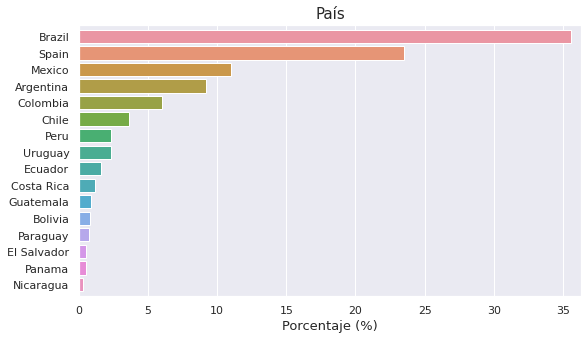

In [9]:
barploth_normalized(data=df.Country, title='País', label=False)

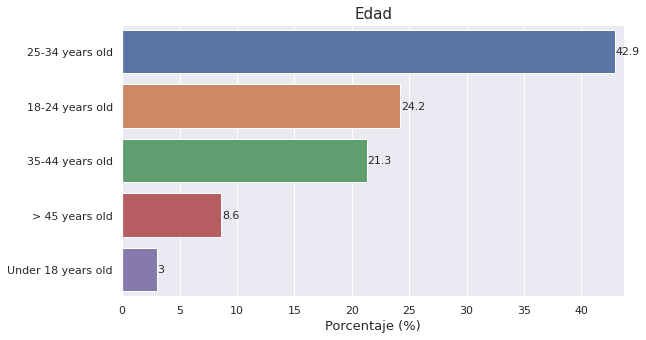

In [10]:
barploth_normalized(df.Age, title='Edad', padding=1)

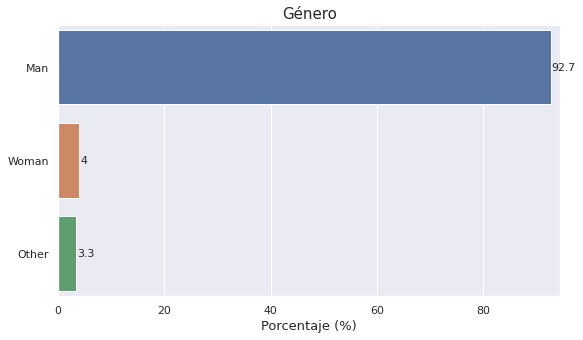

In [11]:
barploth_normalized(df.Gender, title='Género', padding=1)

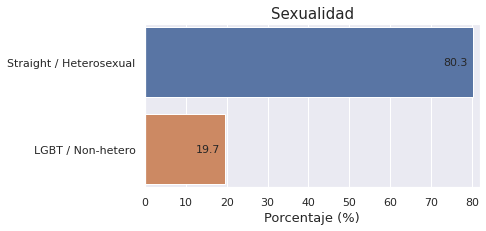

In [12]:
barploth_normalized(df.Sexuality, title='Sexualidad', figsize=(6, 3))

* Las personas encuestadas que se identificaron como hombres son el 80%. Esto muestra una fuerte desigualdad de género.

* De la misma forma, personas que se identifican como no heterosexuales son minoría.

### Educación

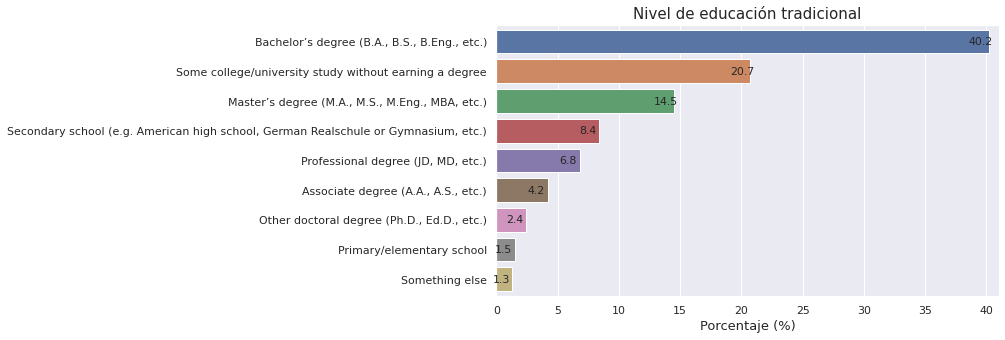

In [13]:
barploth_normalized(df.EdLevel, title='Nivel de educación tradicional', padding=-20)

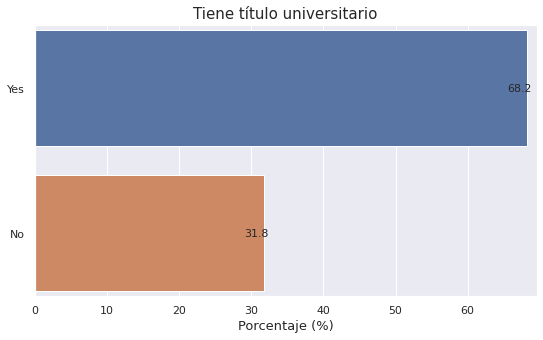

In [14]:
barploth_normalized(df.Degree, title='Tiene título universitario', padding=-20)

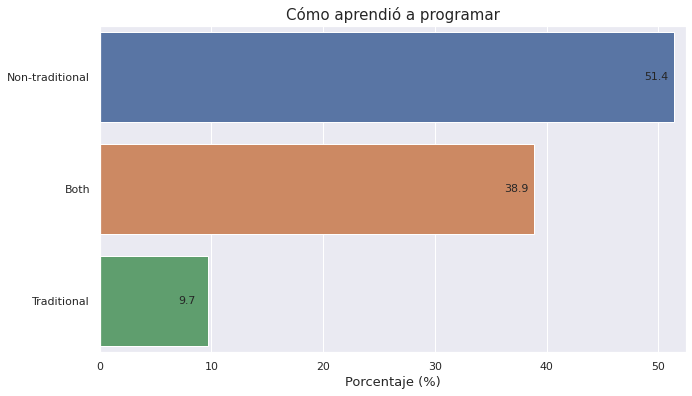

In [15]:
barploth_normalized(df.LearnCode, title='Cómo aprendió a programar', figsize=(10.5, 6))

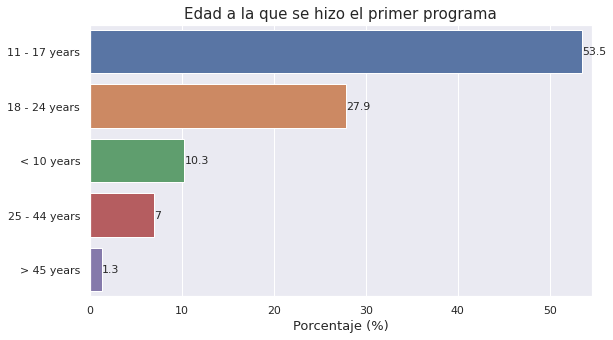

In [16]:
barploth_normalized(df.Age1stCode, title='Edad a la que se hizo el primer programa', padding=0)

* La mayoría tiene estudios superiores. Pero pocas personas dicen haber aprendido en la universidad. Esto sugiere que la mayoría aprendió de forma autodidacta o no tradicional.

* Casi el 90% hizo su primer programa antes de los 24 años.

### Empleo

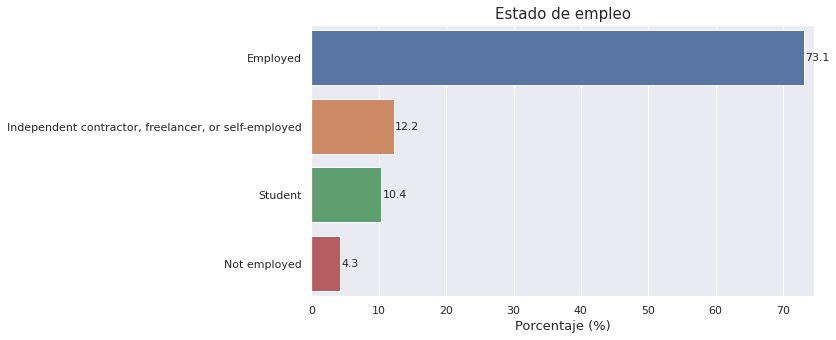

In [17]:
barploth_normalized(df.Employment, title='Estado de empleo', padding=1)

In [18]:
# Yearscode
px.histogram(df, x='YearsLearnPro', marginal='box', title='Años desde que aprendió código hasta ser profesional', nbins=50)

Se crea una nueva función y un DataFrame para poder graficar las variables con respuestas múltiples.

In [19]:
# Function for multi-answers columns
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [20]:
# Mainbranch is a multi-answer column
total_m = split_multicolumn(df.MainBranch).sum().sum()
df_mainbranch = (split_multicolumn(df.MainBranch).sum()/total_m).sort_values(ascending=False)

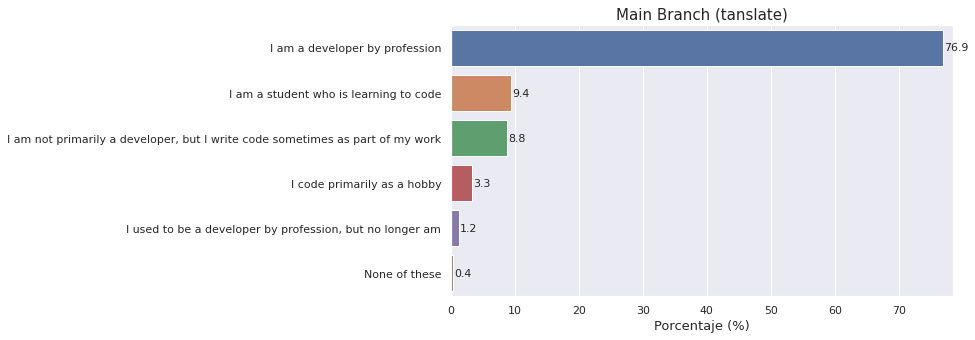

In [21]:
barploth_normalized(df_mainbranch, title='Main Branch (tanslate)', padding=1)

In [22]:
px.histogram(df, x='ConvertedCompYearly', marginal='box', title='Salarios')

### Dev types

In [23]:
# DevType is a multi-answer column
total_d = split_multicolumn(df.DevType).sum().sum()
df_DevType = (split_multicolumn(df.DevType).sum()/total_d).sort_values(ascending=False)

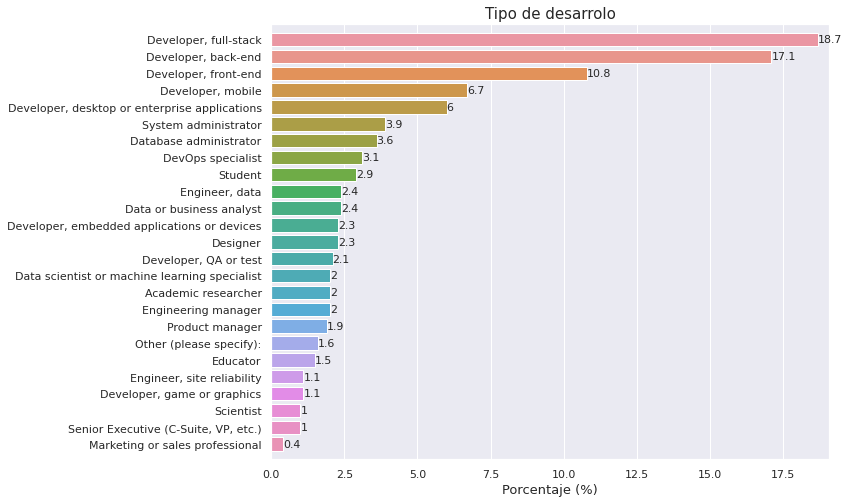

In [24]:
barploth_normalized(df_DevType, title='Tipo de desarrolo', figsize=(10, 8), padding=0)

In [25]:
# Revisar que ya se haya analizado todas las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6295 entries, 0 to 6294
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ResponseId           6295 non-null   int64  
 1   Age                  6269 non-null   object 
 2   Gender               6295 non-null   object 
 3   Trans                6207 non-null   object 
 4   Sexuality            6295 non-null   object 
 5   Country              6295 non-null   object 
 6   EdLevel              6284 non-null   object 
 7   Age1stCode           6290 non-null   object 
 8   LearnCode            6276 non-null   object 
 9   YearsCode            6220 non-null   float64
 10  YearsCodePro         5155 non-null   float64
 11  MainBranch           6295 non-null   object 
 12  Employment           6293 non-null   object 
 13  DevType              5549 non-null   object 
 14  ConvertedCompYearly  4388 non-null   float64
 15  YearsLearnPro        5147 non-null   f

### Next steps

- Creo que se podría hacer aquí otro procesamiento de data para las preguntas que se vayan a resolver. Tipo agrupaciones o whatever (en caso de ser necesario).
- Resolver las preguntas y generar pruebas de hipótesis en otro Notebook (?) ¿O en este mismo y en otro solo los reportes finales? -> Creo que las hipótesis en otro y el reporte también en otro. Serían 2.
- ¿Se puede hacer correlaciones? -> ~~Sí, hagamos un pairplot. Y una matriz de covarianza.~~ No hay correlación entre las variables numéricas.

In [26]:
df.head()

,ResponseId,Age,Gender,Trans,Sexuality,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,MainBranch,Employment,DevType,ConvertedCompYearly,YearsLearnPro,Degree
0,12,25-34 years old,Man,No,Straight / Heterosexual,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Both,12.0,5.0,I am a developer by profession,Employed,"Developer, back-end",46482.0,7.0,Yes
1,20,25-34 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Non-traditional,12.0,9.0,"I used to be a developer by profession, but no...",Employed,Other (please specify):,NaN,3.0,Yes
2,46,35-44 years old,Man,No,Straight / Heterosexual,Brazil,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Non-traditional,22.0,15.0,I am a developer by profession,Employed,"Developer, desktop or enterprise applications;...",60480.0,7.0,Yes
3,69,35-44 years old,Man,No,Straight / Heterosexual,Spain,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Traditional,20.0,10.0,I am a developer by profession,Employed,"Developer, back-end",58373.0,10.0,Yes
4,80,18-24 years old,Man,No,Straight / Heterosexual,Spain,"Associate degree (A.A., A.S., etc.)",11 - 17 years,Non-traditional,NaN,NaN,I am a developer by profession,Employed,"Developer, back-end",21620.0,NaN,Yes


In [27]:
df.dtypes

ResponseId               int64
Age                     object
Gender                  object
Trans                   object
Sexuality               object
Country                 object
EdLevel                 object
Age1stCode              object
LearnCode               object
YearsCode              float64
YearsCodePro           float64
MainBranch              object
Employment              object
DevType                 object
ConvertedCompYearly    float64
YearsLearnPro          float64
Degree                  object
dtype: object

## Bi and multivariate EDA

### Género y compensación

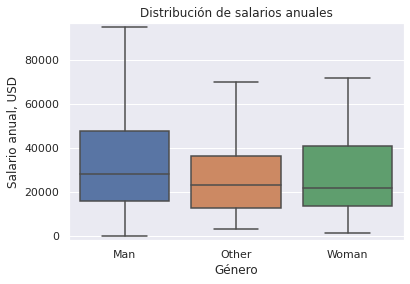

In [28]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Gender", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales')
plt.xlabel('Género')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

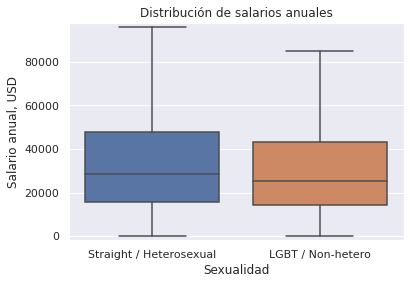

In [29]:
fig, ax = plt.subplots()
ax = sns.boxplot(x="Sexuality", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales')
plt.xlabel('Sexualidad')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

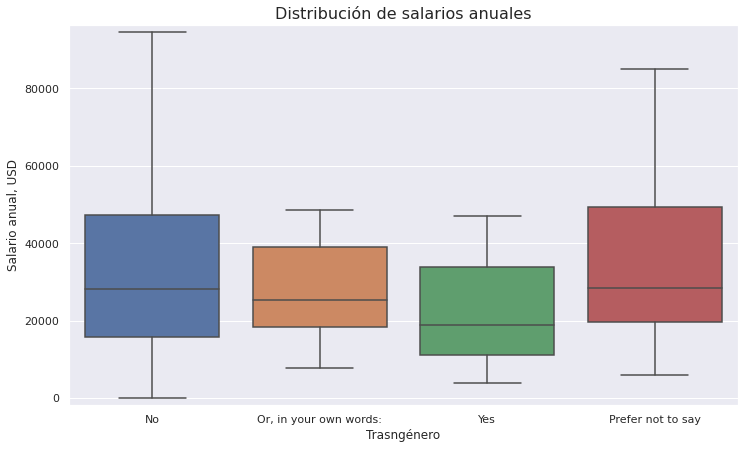

In [30]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x="Trans", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales', size=16)
plt.xlabel('Trasngénero')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

- Específicamente los que dijeron `Yes` son los que menos ganan.

**Ideas**

* Los hombres ganan un poco más según la gráfica. Probémoslo o rechacémoslo con test de hipótesis. Lo mismo para sexualidad y personas que se definen como transgénero.

### Edades y salarios

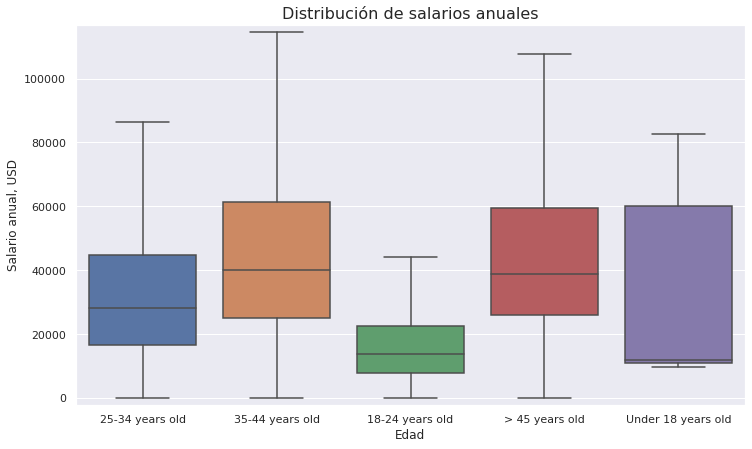

In [31]:
fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.boxplot(x="Age", y="ConvertedCompYearly", data=df, showfliers=False)
plt.title('Distribución de salarios anuales', size=16)
plt.xlabel('Edad')
plt.ylabel('Salario anual, USD')
plt.margins(0.02)
plt.show()

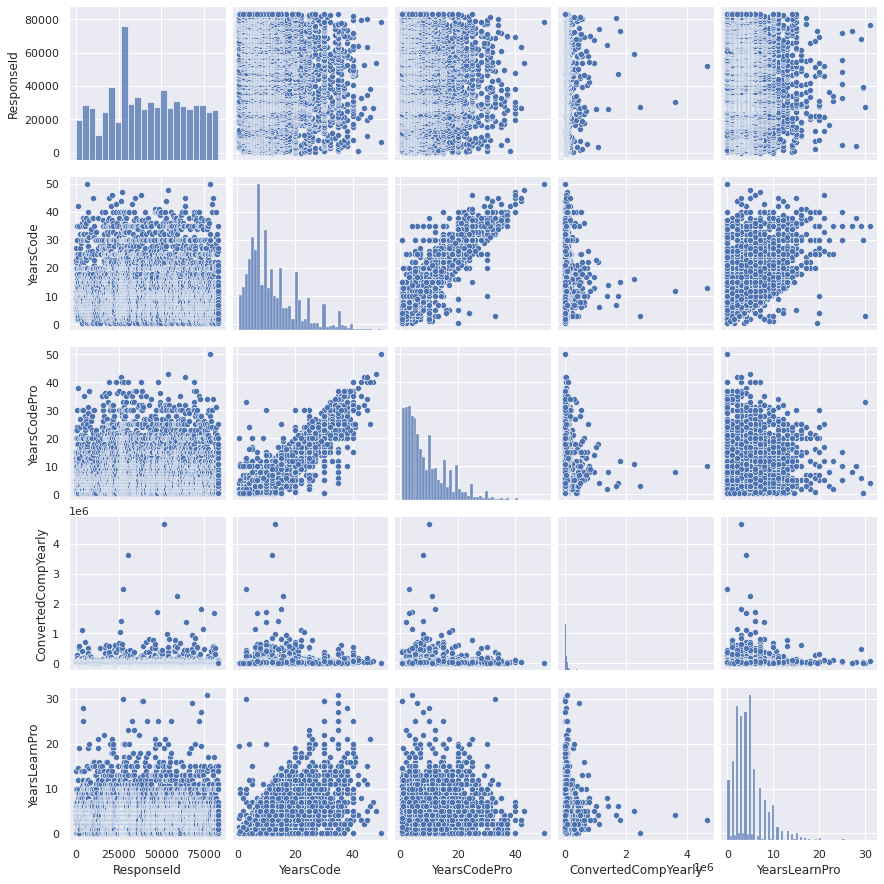

In [32]:
#sns.pairplot(df[['YearsCode', 'YearsCodePro', 'ConvertedCompYearly']], hue=df['Gender'])
sns.pairplot(df)

In [33]:
df.corr()

,ResponseId,YearsCode,YearsCodePro,ConvertedCompYearly,YearsLearnPro
ResponseId,1.000000,-0.048735,-0.024430,0.020287,-0.025331
YearsCode,-0.048735,1.000000,0.894758,0.090878,0.487761
YearsCodePro,-0.024430,0.894758,1.000000,0.088646,0.115675
ConvertedCompYearly,0.020287,0.090878,0.088646,1.000000,0.024953
YearsLearnPro,-0.025331,0.487761,0.115675,0.024953,1.000000


### Dónde aprendieron y salario

Comparar la distribución de salarios de universidad y métodos no tradicionales. También por rangos de edad

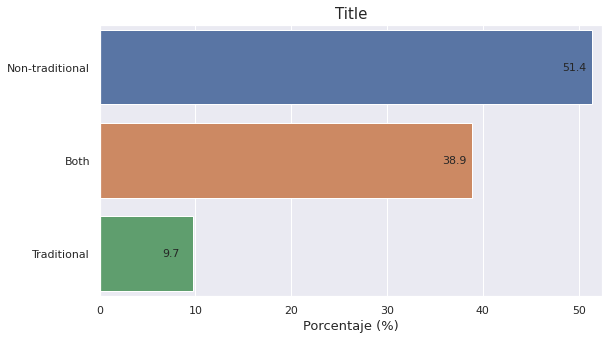

In [34]:
barploth_normalized(df.LearnCode)

In [35]:
df.groupby(['Age', 'LearnCode'])['ConvertedCompYearly'].agg(lambda x: stats.trim_mean(x, 0.2))

Age                 LearnCode      
18-24 years old     Both                        NaN
                    Non-traditional             NaN
                    Traditional                 NaN
25-34 years old     Both               39197.728296
                    Non-traditional             NaN
                    Traditional        48705.062857
35-44 years old     Both               59254.393846
                    Non-traditional             NaN
                    Traditional                 NaN
> 45 years old      Both                        NaN
                    Non-traditional             NaN
                    Traditional                 NaN
Under 18 years old  Both                        NaN
                    Non-traditional             NaN
                    Traditional                 NaN
Name: ConvertedCompYearly, dtype: float64

In [36]:
df.groupby(['Age', 'LearnCode'])['ConvertedCompYearly'].mean().round(2)

Age                 LearnCode      
18-24 years old     Both               18333.27
                    Non-traditional    19006.74
                    Traditional        27990.52
25-34 years old     Both               44146.97
                    Non-traditional    51018.76
                    Traditional        71443.70
35-44 years old     Both               56220.59
                    Non-traditional    74909.93
                    Traditional        65226.29
> 45 years old      Both               53990.01
                    Non-traditional    59525.56
                    Traditional        50094.25
Under 18 years old  Both               11760.00
                    Non-traditional    40851.00
                    Traditional             NaN
Name: ConvertedCompYearly, dtype: float64

In [37]:
df.groupby(['Age', 'LearnCode'])['ConvertedCompYearly'].count()

Age                 LearnCode      
18-24 years old     Both                347
                    Non-traditional     383
                    Traditional          81
25-34 years old     Both                855
                    Non-traditional    1083
                    Traditional         237
35-44 years old     Both                438
                    Non-traditional     502
                    Traditional         107
> 45 years old      Both                126
                    Non-traditional     191
                    Traditional          20
Under 18 years old  Both                  1
                    Non-traditional       4
                    Traditional           0
Name: ConvertedCompYearly, dtype: int64

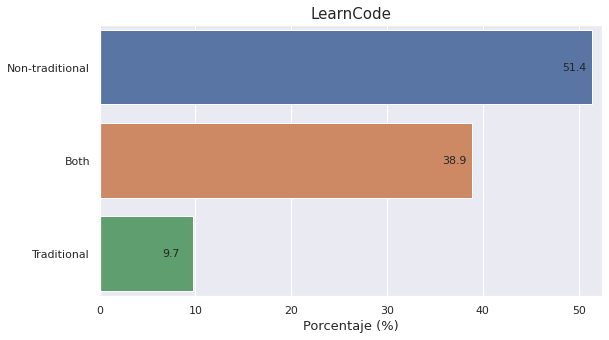

In [38]:
barploth_normalized(df.LearnCode, title='LearnCode')

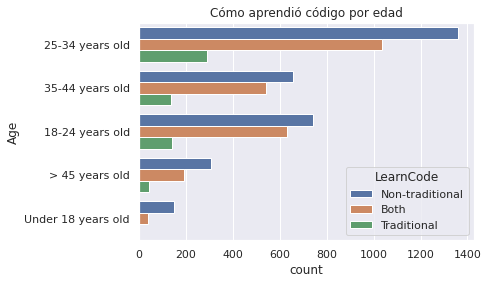

In [39]:
sns.countplot(y=df.Age, hue=df.LearnCode, hue_order=['Non-traditional', 'Both', 'Traditional'])
plt.title('Cómo aprendió código por edad')
plt.show()

- Para todos los rangos de edad la forma de aprender a programar se comporta igual, la mayoría aprendieron a programar de maneras no tradicionales

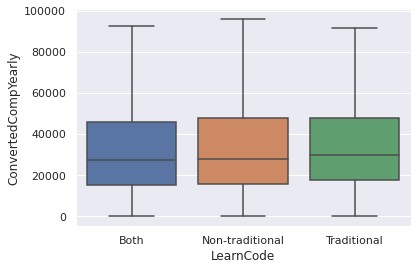

In [40]:
sns.boxplot(x=df.LearnCode, y=df.ConvertedCompYearly, showfliers=False)
plt.show()

Mejorar ese gráfico para no visualizar outliers

In [78]:
def max_no_outlier(data):
    q1 = np.percentile(data.dropna(), 25)
    q3 = np.percentile(data.dropna(), 75)
    iqr = q3 - q1
    maximum = q3 + 1.5*iqr

    return maximum

In [77]:
np.percentile(list(df.ConvertedCompYearly.dropna()), 7)
#df.ConvertedCompYearly.values

7068.0

In [79]:
#df[['EdLevel', 'ConvertedCompYearly']].
median_salary = df.groupby('EdLevel')[['ConvertedCompYearly']].agg(max_no_outlier).sort_values(by='ConvertedCompYearly', ascending=False)

In [80]:
median_salary

,ConvertedCompYearly
EdLevel,
Primary/elementary school,118659.500
"Other doctoral degree (Ph.D., Ed.D., etc.)",113382.500
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",103538.625
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",90468.000
Some college/university study without earning a degree,89818.500
Something else,78738.000
"Associate degree (A.A., A.S., etc.)",76273.500
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",70392.000
"Professional degree (JD, MD, etc.)",69272.625


In [44]:
median_salary.index

Index(['Associate degree (A.A., A.S., etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school', 'Professional degree (JD, MD, etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Something else'],
      dtype='object', name='EdLevel')

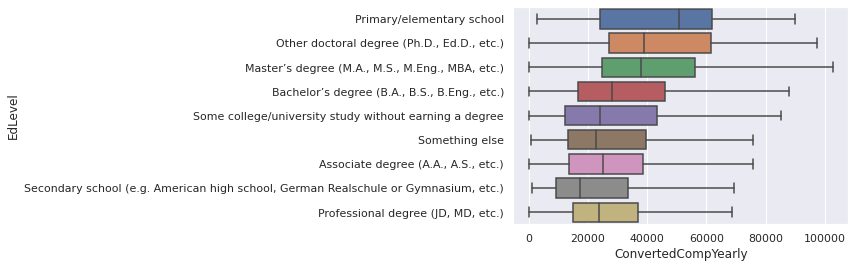

In [81]:
sns.boxplot(y=df.EdLevel, x=df.ConvertedCompYearly, order=list(median_salary.index), showfliers=False)
plt.show()
# lol -> Ordenamos por mediana? O sabes cómo obtener ese máximo?
# Se le ocurre por el top X percentil. También podría ser la trimmed mean, pero no sé cómo sacarla con group by, ayer fallé en eso

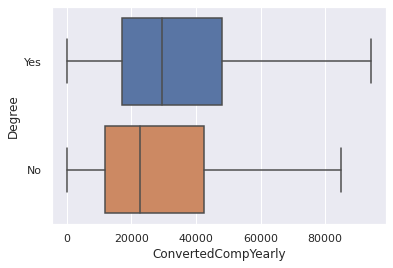

In [46]:
sns.boxplot(y=df.Degree, x=df.ConvertedCompYearly, showfliers=False)
plt.show()

In [47]:
# Degree or EdLevel and LearnCode

#### Tienen empleo o no según tipo de educación

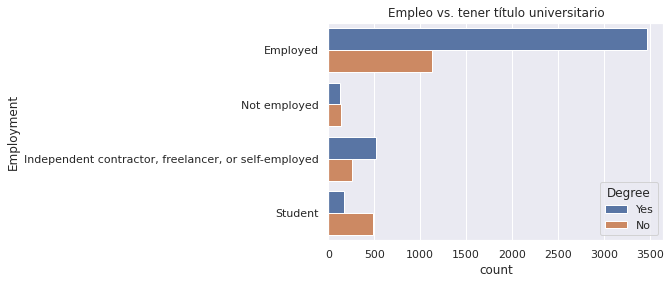

In [53]:
# Degree and Employment
sns.countplot(y=df.Employment, hue=df.Degree)
plt.title('Empleo vs. tener título universitario')
plt.show()

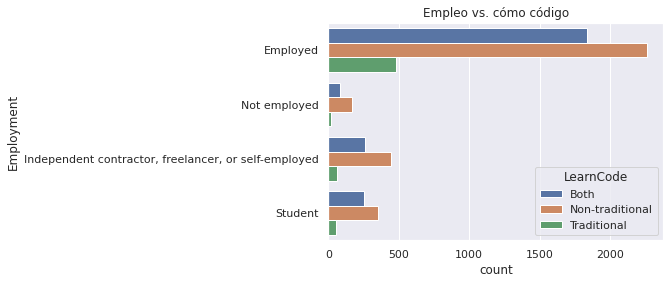

In [55]:
# LearnCode and Employment
sns.countplot(y=df.Employment, hue=df.LearnCode)
plt.title('Empleo vs. cómo código')
plt.show()

#### Preguntas posibles relacionadas al tema

- Education lvl vs. dónde aprendió a programar
- Salarios por rango de edad
- Devtype por dónde aprendió a programar
- Salarios según dónde se aprendió a programar
- ¿Si tengo título gano más que si no?
- Qué cargos tienes según dónde estudiaste
- Cuánto tiempo te tomó desde que aprendiste código hasta que programaste profesionalmente? (dónde aprendiste a programar)
- Las personas que aprendieron a programar más jóvenes, ganan más? Qué puesto tienen? (contestar según rangos de edad)


#### Otras preguntas

- Diferencia de salario entre trans y heteros (y si fueron a las universidades)?
- Diferencia de salario entre hombres y mujeres
- Lenguajes de programación aprendidos por tipo de aprendizaje

- Extraer algo para mejorar esto y cerrar la brecha

#### Accionables:
- Cómo disminuir esta brecha de género

#### To-Do
- Dividir el análisis por partes o por preguntas
- Crear una (o varias) función para plotear
- Crear un notebook con el código escondido, que sea solo de reporte y gráficas

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09491c61-3767-4289-98fd-88aee19bb45d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>